In [1]:
import os
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import json_normalize
warnings.filterwarnings("ignore")

In [17]:
#Read the csv

data = pd.read_csv('measurements.csv')

In [18]:
data.shape

#Looks like the csv and excel file might have similar data

(388, 12)

In [19]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [ ]:
#They are the same. So I'm going forward with the data data frame.

#### Data Cleaning

In [20]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [24]:
data['refill gas'].unique()

array(['E10', nan, 'SP98'], dtype=object)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [26]:
#Cleaning distance, consume and temp_inside. Written in european style as 21,5. COnverting to 21.5

data["distance"] = data["distance"].str.replace(',', '.')
data["consume"] = data["consume"].str.replace(',', '.')
data["temp_inside"] = data["temp_inside"].str.replace(',', '.')
data["refill liters"] = data["refill liters"].str.replace(',', '.')

#Converting them from object to float/number
data["distance"] = data["distance"].astype(float)
data["consume"] = data["consume"].astype(float)
data["temp_inside"] = data["temp_inside"].astype(float)
data["refill liters"] = data["refill liters"].astype(float)

In [27]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [28]:
data["temp_inside"] = data["temp_inside"].fillna(np.mean(data["temp_inside"]))

In [29]:
print(data.dtypes)
print(data.isnull().sum())

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object
distance           0
consume            0
speed              0
temp_inside        0
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64


Columns Info (From Kaggle):

- distance: (km)．
- consume: (L/100 km)．
- speed: (km/h )．
- temp_inside: (deg-C)．
- temp_outside: (deg-C) ．
- specials: "rain"，snow"，"climatization".
- gas_type: SP98,E10
- AC: 1 - climatization, 0 -no climatization
- rain: 1 - rain． / 0 - no rain
- sun: 1 - sun． / 0 - no sun．

#### Visualizations

Text(0.5, 1.0, 'temp_outside(deg-C)')

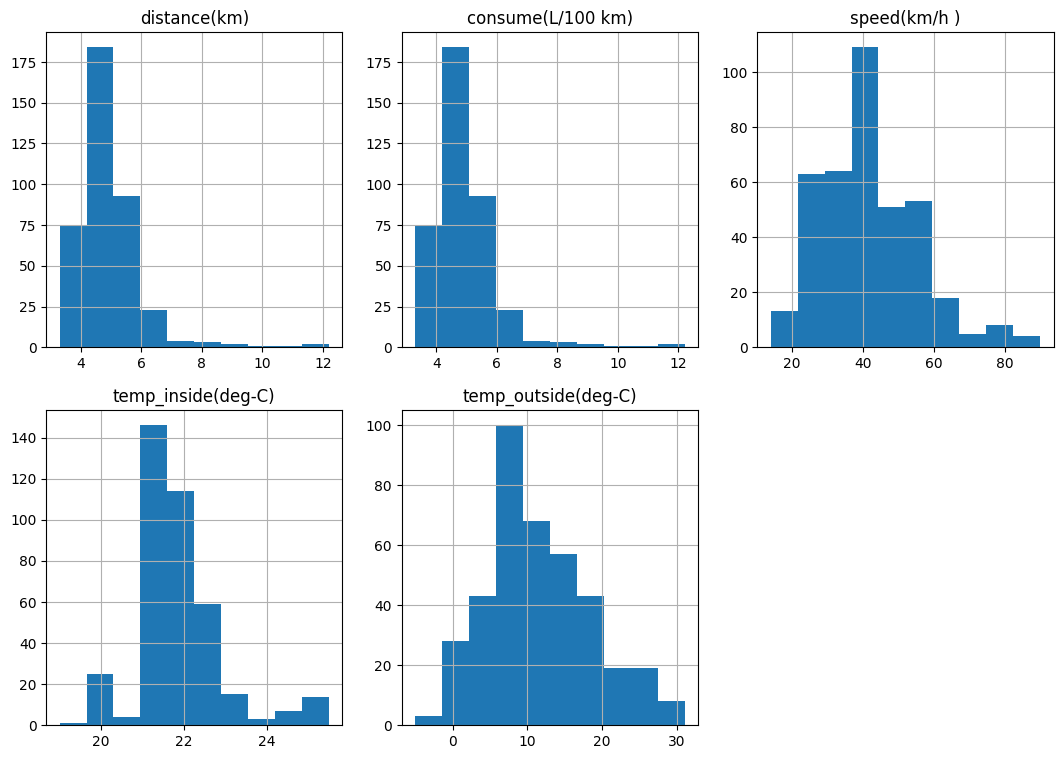

In [31]:
plt.figure(figsize=(13,9))
ax1=plt.subplot(2,3,1)
data.consume.hist(bins=10,ax=ax1)
plt.title("distance(km)")

ax2=plt.subplot(2,3,2)
data.consume.hist(bins=10,ax=ax2)
plt.title("consume(L/100 km)")

ax3=plt.subplot(2,3,3)
data.speed.hist(bins=10,ax=ax3)
plt.title("speed(km/h )")

ax4=plt.subplot(2,3,4)
data.temp_inside.hist(bins=10,ax=ax4)
plt.title("temp_inside(deg-C)")

ax5=plt.subplot(2,3,5)
data.temp_outside.hist(bins=10,ax=ax5)
plt.title("temp_outside(deg-C)")

#### 3.2 Compare between GAS TYPE & CONSUME.


Text(0.5, 1.0, 'gas_type & consume')

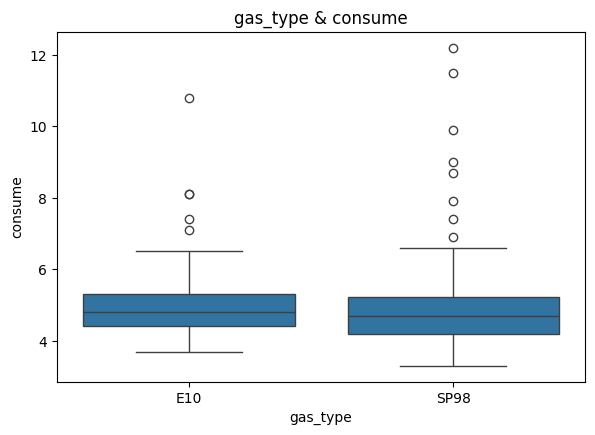

In [36]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot(2,2,1)
sns.boxplot(x = data['gas_type'],
              y = data['consume'],ax=ax1)
plt.title("gas_type & consume")

gas_type       E10       SP98
mean       4.93125   4.899123
median     4.80000   4.700000
min        3.70000   3.300000
max       10.80000  12.200000


Text(0.5, 1.0, 'gas_type & consume')

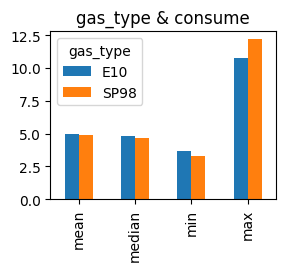

In [39]:
ax3 = plt.subplot(2,2,3)
c = data.groupby("gas_type")["consume"].agg([np.mean,np.median,np.min,np.max])
data_T = pd.DataFrame(c.values.T,columns=c.index,index=c.columns)
print(data_T)
k1 = data_T.plot(kind="bar",ax=ax3)
plt.title("gas_type & consume")


Text(0.5, 1.0, 'gas_type & consume')

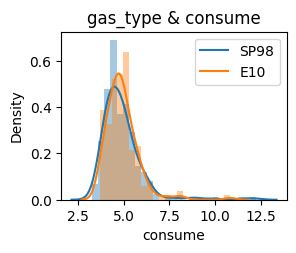

In [40]:
ax4 = plt.subplot(2,2,4)
t = data[["consume","gas_type"]]
sns.distplot(t[t.gas_type=="SP98"]["consume"],ax=ax4)
sns.distplot(t[t.gas_type=="E10"]["consume"],ax=ax4)
plt.legend(["SP98","E10"])
plt.title("gas_type & consume")

#Observation:
There are more SP98 data than E10 data, E10 appears to consume more than SP98

#### Compare between AC & CONSUME

AC             0          1
mean     4.88352   5.256667
median   4.70000   4.900000
min      3.30000   4.000000
max     11.50000  12.200000


Text(0.5, 1.0, 'AC & consume')

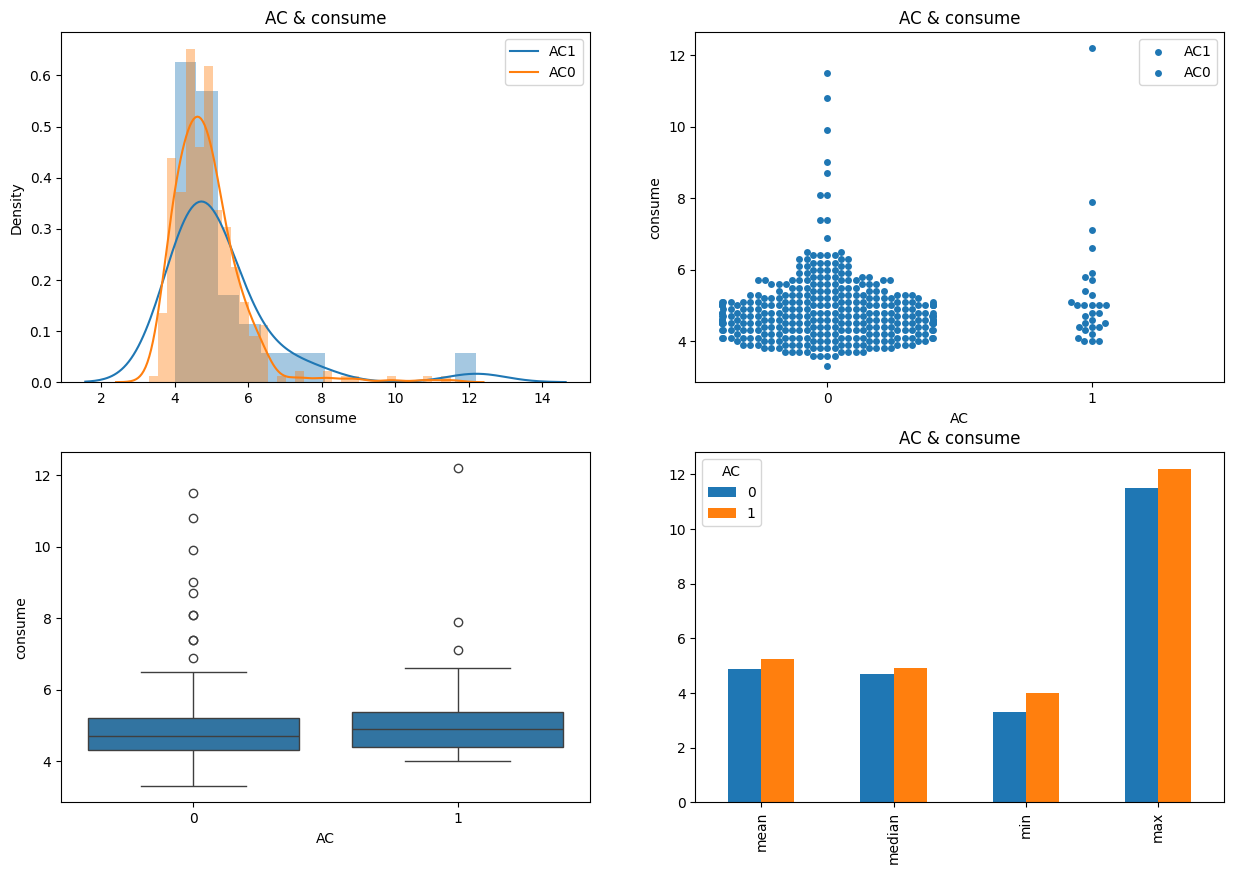

In [41]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot(2,2,1)
sns.distplot(data[data.AC==1].consume,ax=ax1)
sns.distplot(data[data.AC==0].consume,ax=ax1)
plt.legend(["AC1","AC0"])
plt.title("AC & consume")

ax2 = plt.subplot(2,2,2)
sns.swarmplot(x=data.AC,y=data.consume,ax=ax2)
plt.legend(["AC1","AC0"])
plt.title("AC & consume")

ax3 = plt.subplot(2,2,3)
sns.boxplot(x = data.AC,y = data.consume,ax=ax3)

ax4 = plt.subplot(2,2,4)
c = data.groupby("AC")["consume"].agg([np.mean,np.median,np.min,np.max])
df_T = pd.DataFrame(c.values.T,columns=c.index,index=c.columns)
print(df_T)
k1 = df_T.plot(kind="bar",ax=ax4)
plt.title("AC & consume")